# Data Exploration, Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r"d:\Projects\Sales_forecasting_reatil_chain\data\raw\Online Retail.csv")

In [3]:
df = df.copy()

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Checking the shape of the dataset
df.shape

(541909, 8)

In [6]:
# Checking the columns of the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Summary statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Null value count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

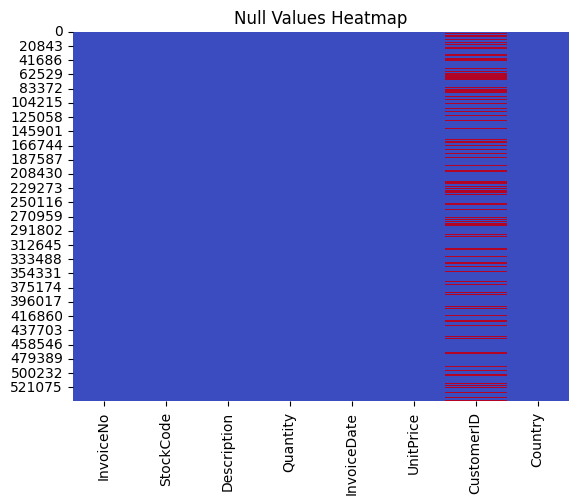

In [10]:
# Null value heat map
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Null Values Heatmap")
plt.show()

In [11]:
# Dropping the null values from the columns 'Description' and 'CustomerID'
df.dropna(subset=['Description', 'CustomerID'], inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.shape

(406829, 8)

In [13]:
# Count duplicate rows
df.duplicated().sum()

np.int64(5225)

In [14]:
# Dropping duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(401604, 8)

In [16]:
# Number of unique values accross columns
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [ ]:
# Converting to date time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Converting to valid data type for grouping 
df['CustomerID'] = df['CustomerID'].astype('str') 

# Converting to cateforical data types
df['Country'] = df['Country'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.9+ MB


In [18]:
# Check for negative or zero values in 'Quantity' and 'Price'
print(df[df['Quantity'] <= 0])
print(df[df['UnitPrice'] <= 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50    145

In [19]:
# Extracting date components
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Year'] = df['InvoiceDate'].dt.year
df['MonthName'] = df['InvoiceDate'].dt.strftime('%B')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Creating new feature of Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Check the new columns
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Year,MonthName,DayOfWeek,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,December,Wednesday,8,20.34


In [20]:
# Saving a seperate dataset for sales forecasting
df.to_csv(r"d:\Projects\Sales_forecasting_reatil_chain\data\cleaned\online_retail.csv", index=False)

### Summary of Dataset Exploration, Cleaning and Preprocessing 
1. Loaded the dataset and checked its basic structure, number of columns, their contents and data types
2. Checked and removed null values after analyzing them via heatmaps where in the <b>customer_ID</b> column had the most number of null values with some also being there in <b>description</b> column.
3. Checked and dropped the rows with duplicate values.
4. Checked for unique values present in each and every column.
5. Converted <b>CustomerID</b> to string and <b>Country</b> column to categorical for grouping.
4. Checked for the number of values that are 0 or less than 0 in the <b>Quantity</b> and <b>Unit Price</b> column with negative value in quantity suggesting return of product.
4. Extracted the date components from the column <b>InvoiceDate</b> and created a new column of <b>Total Price</b>.
5. Saved the cleaned data into a new csv file.